# i. Perkenalan 

---

Graded Challenge 5

Nama  : Kenneth Vincentius

Batch : HCK-007

Membuat Model dimana untuk mempredik apakah user bisa atau tidak membayar untuk bulan depan berdasarkan history data pembayaran user pada bulan-bulan sebelumnya

---

 Latar Belakang : Saya adalah seorang data sientict di PT. ABC dan saya diberikan proyek untuk mengelola data set tentang credit score pembayaran user mereka. Saya diminta untuk memilih model yang tepat yang tepat untuk digunakan pada dataset ini dan saya juga harus memberikan prediksi terhadap user-user yang ada apakah mereka bisa membayar untuk bulan berikutnya atau tidak berdasarkan dari data history mereka sebelum-sebelumnya

Problem Statement : Memprediksi kemampuan user untuk membayar sehingga dapat mengurangi user yang tidak mampu bayar sebanyak 10% dalam waktu 3 bulan untuk mengurangi kerugian

# ii. SQL Query

Syntax SQL untuk memilih kolom mana saja yang akan digunakan untuk 

```sql
SELECT
    limit_balance,
    CAST(sex AS INT64) AS sex,
    CAST(education_level AS INT64) AS education_level,
    CAST(marital_status AS INT64) AS marital_status,
    age,
    pay_0,
    pay_2,
    pay_3,
    pay_4,
    CAST(pay_5 AS FLOAT64) AS pay_5,
    CAST(pay_6 AS FLOAT64) AS pay_6,
    bill_amt_1,
    bill_amt_2,
    bill_amt_3,
    bill_amt_4,
    bill_amt_5,
    bill_amt_6,
    pay_amt_1,
    pay_amt_2,
    pay_amt_3,
    pay_amt_4,
    pay_amt_5,
    pay_amt_6,
    CAST(default_payment_next_month AS INT64) AS default_payment_next_month
FROM `bigquery-public-data.ml_datasets.credit_card_default`
LIMIT 19950;
```

# iii. Import Libraries 

In [70]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import kendalltau
import pickle


# preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from feature_engine.outliers import Winsorizer , OutlierTrimmer
from imblearn.over_sampling import SMOTENC

# model 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, f1_score, accuracy_score, precision_score, recall_score
from sklearn.model_selection import cross_val_score

# iv. Data Loading

In [71]:
#loading data csv yang sudah disimpan ke dalam bentuk csv dari bigquery
df=pd.read_csv('../dataset/P1G1_Kenneth Vincentius.csv')

In [72]:
#menampilkan 10 data teratas 
df.head(10)

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,80000.0,1,6,1,54.0,0.0,0.0,0.0,0.0,0.0,...,29296.0,26210.0,17643.0,2545.0,2208.0,1336.0,2232.0,542.0,348.0,1
1,200000.0,1,4,1,49.0,0.0,0.0,0.0,0.0,0.0,...,50146.0,50235.0,48984.0,1689.0,2164.0,2500.0,3480.0,2500.0,3000.0,0
2,20000.0,2,6,2,22.0,0.0,0.0,0.0,0.0,0.0,...,1434.0,500.0,0.0,4641.0,1019.0,900.0,0.0,1500.0,0.0,1
3,260000.0,2,4,2,33.0,0.0,0.0,0.0,0.0,0.0,...,27821.0,30767.0,29890.0,5000.0,5000.0,1137.0,5000.0,1085.0,5000.0,0
4,150000.0,1,4,2,32.0,0.0,0.0,0.0,-1.0,0.0,...,150464.0,143375.0,146411.0,4019.0,146896.0,157436.0,4600.0,4709.0,5600.0,0
5,300000.0,2,4,2,32.0,0.0,0.0,0.0,0.0,0.0,...,65150.0,-450.0,700.0,15235.0,1491.0,1303.0,0.0,2000.0,1400.0,0
6,130000.0,1,1,1,45.0,0.0,0.0,0.0,0.0,0.0,...,62377.0,63832.0,65099.0,2886.0,2908.0,2129.0,2354.0,2366.0,2291.0,0
7,200000.0,1,1,1,58.0,0.0,0.0,0.0,0.0,0.0,...,124647.0,126921.0,129167.0,7822.0,4417.0,4446.0,4597.0,4677.0,4698.0,0
8,500000.0,1,1,1,39.0,0.0,0.0,0.0,0.0,0.0,...,174500.0,137406.0,204975.0,54209.0,4607.0,4603.0,5224.0,207440.0,7509.0,0
9,230000.0,1,1,1,48.0,0.0,0.0,0.0,0.0,0.0,...,105508.0,108101.0,110094.0,7000.0,6607.0,3773.0,4290.0,4164.0,2000.0,0


In [73]:
#menampilkan 10 data terbawah
df.tail(10)

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
2955,360000.0,2,2,2,26.0,-1.0,-1.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,463.0,2500.0,0.0,0.0,0.0,0.0,0
2956,100000.0,1,3,1,40.0,0.0,0.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,2000.0,2377.0,40000.0,0.0,0.0,0.0,0
2957,30000.0,2,3,1,48.0,1.0,-1.0,-1.0,-2.0,-2.0,...,0.0,0.0,0.0,200.0,0.0,0.0,0.0,0.0,0.0,0
2958,80000.0,2,3,1,39.0,-1.0,-1.0,-1.0,-1.0,-2.0,...,0.0,0.0,5000.0,5000.0,5000.0,0.0,5000.0,5000.0,470.0,0
2959,20000.0,1,3,2,26.0,-1.0,-1.0,-1.0,-2.0,-2.0,...,0.0,0.0,0.0,1560.0,0.0,0.0,0.0,0.0,0.0,0
2960,80000.0,2,3,2,28.0,-1.0,-1.0,-1.0,-2.0,-2.0,...,0.0,0.0,0.0,2800.0,0.0,0.0,0.0,0.0,0.0,0
2961,50000.0,2,3,1,51.0,-1.0,-1.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,300.0,5880.0,0.0,0.0,0.0,0.0,1
2962,450000.0,2,2,1,38.0,-2.0,-2.0,-2.0,-2.0,-2.0,...,390.0,390.0,390.0,390.0,780.0,390.0,390.0,390.0,390.0,1
2963,50000.0,2,2,1,44.0,-2.0,-2.0,-2.0,-2.0,-2.0,...,390.0,390.0,0.0,390.0,390.0,390.0,390.0,0.0,780.0,0
2964,290000.0,2,2,1,39.0,1.0,-2.0,-2.0,-2.0,-2.0,...,3184.0,390.0,390.0,10000.0,800.0,3184.0,390.0,390.0,6617.0,0


# v. Exploratory Data Analysis (EDA)

In [74]:
#menampilkan detail kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2965 entries, 0 to 2964
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   limit_balance               2965 non-null   float64
 1   sex                         2965 non-null   int64  
 2   education_level             2965 non-null   int64  
 3   marital_status              2965 non-null   int64  
 4   age                         2965 non-null   float64
 5   pay_0                       2965 non-null   float64
 6   pay_2                       2965 non-null   float64
 7   pay_3                       2965 non-null   float64
 8   pay_4                       2965 non-null   float64
 9   pay_5                       2965 non-null   float64
 10  pay_6                       2965 non-null   float64
 11  bill_amt_1                  2965 non-null   float64
 12  bill_amt_2                  2965 non-null   float64
 13  bill_amt_3                  2965 

In [75]:
#mencek apakah ada data yang missing value
df.isnull().sum()

limit_balance                 0
sex                           0
education_level               0
marital_status                0
age                           0
pay_0                         0
pay_2                         0
pay_3                         0
pay_4                         0
pay_5                         0
pay_6                         0
bill_amt_1                    0
bill_amt_2                    0
bill_amt_3                    0
bill_amt_4                    0
bill_amt_5                    0
bill_amt_6                    0
pay_amt_1                     0
pay_amt_2                     0
pay_amt_3                     0
pay_amt_4                     0
pay_amt_5                     0
pay_amt_6                     0
default_payment_next_month    0
dtype: int64

In [76]:
#merename kolom agar lebih singkat dan sesuai urutan
df.rename(columns={'default_payment_next_month':'def_payment'}, inplace=True)
df.rename(columns={'pay_0':'pay_1'}, inplace=True)

In [77]:
#mencheck duplikasi data 
df[df.duplicated(keep=False)]

,limit_balance,sex,education_level,marital_status,age,pay_1,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,def_payment
2806,200000.0,2,1,1,34.0,1.0,-2.0,-2.0,-2.0,-2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2815,200000.0,2,1,1,34.0,1.0,-2.0,-2.0,-2.0,-2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [78]:
#menremove index yang double
index_to_remove = 2806
df1 = df.drop(index_to_remove)

## Business Knowledge

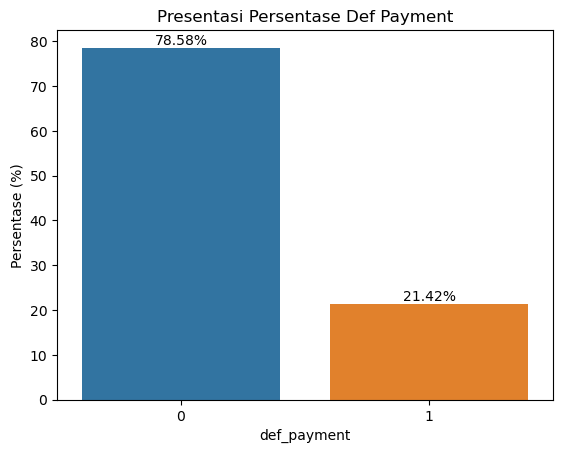

In [79]:
#membuat barplot menampilkan presentase orang yang bisa membayar atau tidak
count_data = df1['def_payment'].value_counts()

total_data = len(df1)

percentage_data = (count_data / total_data) * 100

sns.barplot(x=percentage_data.index, y=percentage_data.values)

plt.title('Presentasi Persentase Def Payment')
plt.xlabel('def_payment')
plt.ylabel('Persentase (%)')

for i in range(len(percentage_data)):
    plt.text(i, percentage_data[i], f'{percentage_data[i]:.2f}%', ha='center', va='bottom')

plt.show()


Hasil : Kita bisa melihat bahwa 78.58% bisa bisa membayar dan 21.42% tidak bisa membayar

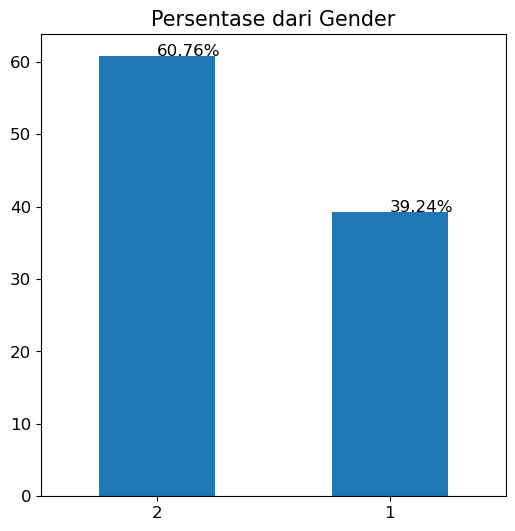

In [80]:
def_count = (df1.sex.value_counts(normalize=True)*100)
def_count.plot.bar(figsize=(6,6))
plt.xticks(fontsize=12, rotation=0)
plt.yticks(fontsize=12)
plt.title("Persentase dari Gender", fontsize=15)
for x,y in zip([0,1],def_count):
    plt.text(x, y, '{:.2f}%'.format(y), fontsize=12)  # Memformat y menjadi dua angka desimal
plt.show()


Hasil : Bisa dilihat bahwa terdapat 39.24% di laki-laki=1 dan 60.76% didominasi oleh perempuan=2

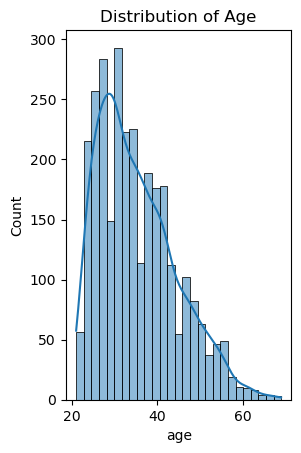

In [82]:
plt.subplot(1, 2, 2)
sns.histplot(df1['age'], kde=True)
plt.title('Distribution of Age')

plt.show()

Hasil : Bisa dilihat bahwa persebaran umur dari umur 20 sampai 50
Untuk Meningkatkan jumlah user yang bisa bayar ada baiknya untuk penagihan bisa dilakukan ditanggal gajian sekitar 25-31 pada saat gajian karena pada saat tanggal tersebut uang mereka jumlahnya banyak jadi bisa membayar 

## Cek Kolerasi

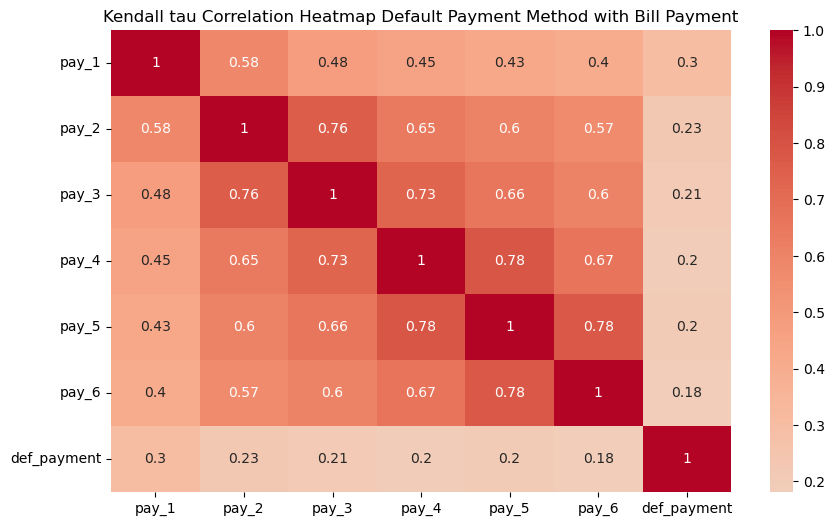

In [83]:
#Menghitung kolerasi def_payment dengan 'pay_1', 'pay_2', 'pay_3', 'pay_4','pay_5','pay_6'
#saya menggunakan kendall karena setelah dicek kembali bahwa datanya merupakan kategorical
billcol = df1[['pay_1', 'pay_2', 'pay_3', 'pay_4','pay_5','pay_6','def_payment']]

kendall_corr_matrix = billcol.corr(method=lambda x, y: kendalltau(x, y).correlation)

plt.figure(figsize=(10, 6))
sns.heatmap(kendall_corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Kendall tau Correlation Heatmap Default Payment Method with Bill Payment')
plt.show()

Hasil : Dari heatmap bisa dilihat bahwa 'pay_1', 'pay_2', 'pay_3', 'pay_4','pay_5','pay_6' memiliki kolerasi dengan kolom def_payment sehingga kolom-kolom tersebut akan dimasukkan ke dalam feature selection

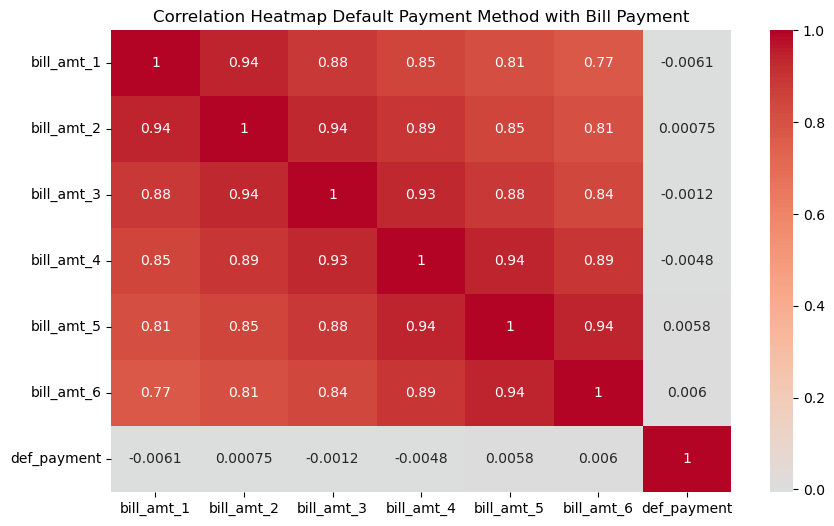

In [84]:
#Menghitung kolerasi def_payment dengan 'bill_amt_1', 'bill_amt_2', 'bill_amt_3', 'bill_amt_4','bill_amt_5','bill_amt_6'
repaymentcol = df1[['bill_amt_1', 'bill_amt_2', 'bill_amt_3', 'bill_amt_4','bill_amt_5','bill_amt_6','def_payment']]

plt.figure(figsize=(10, 6))
sns.heatmap(repaymentcol.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap Default Payment Method with Bill Payment')
plt.show()

Hasil : Dari heatmap bisa dilihat bahwa tidak ada kolom yang memiliki kolerasi dengan kolom def_payment sehingga kolom-kolom tersebut tidak akan dimasukkan ke dalam feature selection

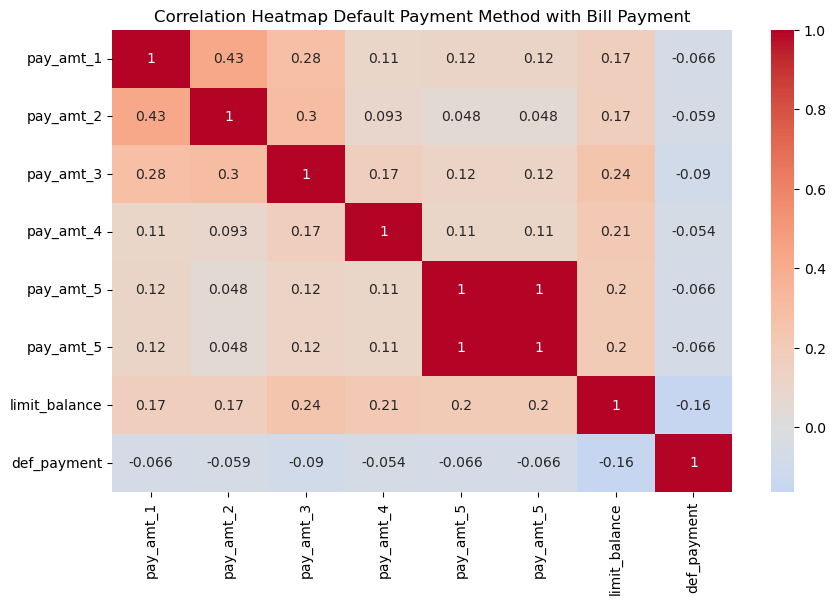

In [85]:
#Menghitung kolerasi def_payment dengan 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4','pay_amt_5','pay_amt_5','limit_balance'
pay_amt_corr = df1[['pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4','pay_amt_5','pay_amt_5','limit_balance','def_payment']]

plt.figure(figsize=(10, 6))
sns.heatmap(pay_amt_corr.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap Default Payment Method with Bill Payment')
plt.show()

Hasil : Dari heatmap bisa dilihat bahwa 'limit_balance' memiliki kolerasi dengan kolom def_payment sehingga kolom-kolom tersebut akan dimasukkan ke dalam feature selection

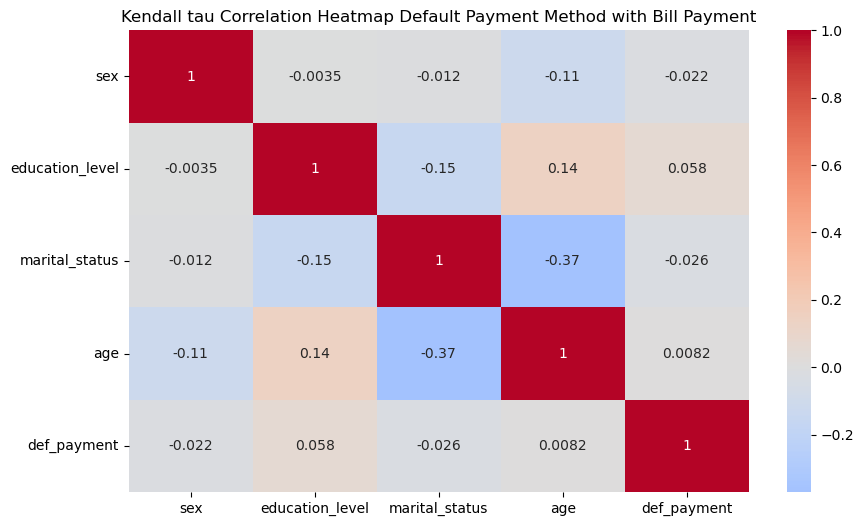

In [86]:
#Menghitung kolerasi def_payment dengan 'sex', 'education_level', 'marital_status', 'age'
#saya menggunakan kendall karena setelah dicek kembali bahwa datanya merupakan kategorical
status_corr = df1[['sex', 'education_level', 'marital_status', 'age', 'def_payment']]

kendall_corr_matrix = status_corr.corr(method=lambda x, y: kendalltau(x, y).correlation)

plt.figure(figsize=(10, 6))
sns.heatmap(kendall_corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Kendall tau Correlation Heatmap Default Payment Method with Bill Payment')
plt.show()

Hasil : Dari heatmap bisa dilihat bahwa tidak ada kolom yang memiliki kolerasi dengan kolom def_payment sehingga kolom-kolom tersebut tidak akan dimasukkan ke dalam feature selection

### Feature Selection

In [87]:
#membuat variabel baru sebgai feature selection
df_fix = df1[['limit_balance','pay_1', 'pay_2', 'pay_3', 'pay_4','pay_5','pay_6','def_payment']]

In [88]:
#memanggil data yang sudah di features selection
df_fix

,limit_balance,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,def_payment
0,80000.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,200000.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,20000.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,260000.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,150000.0,0.0,0.0,0.0,-1.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...
2960,80000.0,-1.0,-1.0,-1.0,-2.0,-2.0,-2.0,0
2961,50000.0,-1.0,-1.0,-1.0,-1.0,-2.0,-2.0,1
2962,450000.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,1
2963,50000.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,0


## Cardinality

In [89]:
#menghitung cardinality
cols_cat= df_fix[['pay_1','pay_2','pay_3','pay_4','pay_5','pay_6']]

for i in cols_cat.columns:
    print(f'cardinality kolom {i}:', cols_cat[i].nunique())

cardinality kolom pay_1: 11
cardinality kolom pay_2: 10
cardinality kolom pay_3: 9
cardinality kolom pay_4: 10
cardinality kolom pay_5: 9
cardinality kolom pay_6: 8


Hasil : Setelah dicek bahwa cardinality pada kolom 'pay_1','pay_2','pay_3','pay_4','pay_5','pay_6' paling tinggi 11 dan masih dalam batas normal menurut saya sehingga tidak perlu di handling

# vi. Feature Engineering

In [90]:
#membagi data yang sudah di future selection menjadi x dan y dengan y yaitu kolom target def_payment
X= df_fix.drop('def_payment', axis=1) #fitur
y= df_fix['def_payment'] #target

In [91]:
#membagi data menjadi X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3,stratify=y)

print('Train Size : ', X_train.shape)
print('Test Size  : ', X_test.shape)
print('Train Size : ', y_train.shape)
print('Test Size  : ', y_test.shape)

Train Size :  (2371, 7)
Test Size  :  (593, 7)
Train Size :  (2371,)
Test Size  :  (593,)


## Handling Outlier

In [92]:
#menghitung persebaran jenis data dengan metode skewness
print(f"Skewness dari distance :{X_train['limit_balance'].skew()}")
print(f"Skewness dari distance :{X_test['limit_balance'].skew()}")

Skewness dari distance :0.9529337693438512
Skewness dari distance :1.1988766501981816


In [93]:
#menghapus outlier pada kolom limit_balance di X train dan X test dengan tukey karena x test skewnessnya lebih dari 1 dan x train skewnessnya mendekati 1 dan outlier kurangd air 5%
Trimmer_price = OutlierTrimmer(capping_method='iqr',
                             tail='both',
                             fold=1.5,
                             variables=['limit_balance'])

X_train_trimmer = Trimmer_price.fit_transform(X_train)
X_test_trimmer = Trimmer_price.transform(X_test)

## Handling Missing Value

In [94]:
#ketika dicek tidak ada missing value pada x train
X_train.isnull().sum()

limit_balance    0
pay_1            0
pay_2            0
pay_3            0
pay_4            0
pay_5            0
pay_6            0
dtype: int64

In [95]:
#ketika dicek tidak ada missing value pada x test
X_test.isnull().sum()

limit_balance    0
pay_1            0
pay_2            0
pay_3            0
pay_4            0
pay_5            0
pay_6            0
dtype: int64

## Scaling

In [96]:
#melakukan scalling dengan menggunakan standard scaller
scaler = MinMaxScaler()
model = scaler.fit(X_train_trimmer[['limit_balance']])
train_scaller = model.transform(X_train_trimmer[['limit_balance']])
test_scaller = scaler.transform(X_test_trimmer[['limit_balance']])

In [97]:
#memanggil kolom limit balanace di train yang sudah di scaling
train_scaller

array([[0.58],
       [0.5 ],
       [0.56],
       ...,
       [0.24],
       [0.14],
       [0.24]])

In [98]:
#memanggil kolom limit balanace di test yang sudah di scaling
test_scaller

array([[0.12],
       [0.08],
       [0.4 ],
       [0.14],
       [0.22],
       [0.22],
       [0.22],
       [0.08],
       [0.7 ],
       [0.7 ],
       [0.68],
       [0.08],
       [0.08],
       [0.46],
       [0.54],
       [0.08],
       [0.02],
       [0.24],
       [0.56],
       [0.16],
       [0.08],
       [0.18],
       [0.08],
       [0.38],
       [0.54],
       [0.24],
       [0.08],
       [0.26],
       [0.8 ],
       [0.36],
       [0.1 ],
       [0.36],
       [0.7 ],
       [0.5 ],
       [0.38],
       [0.26],
       [0.38],
       [0.34],
       [0.42],
       [0.58],
       [0.08],
       [0.04],
       [0.06],
       [0.66],
       [0.08],
       [0.7 ],
       [0.04],
       [0.38],
       [0.54],
       [0.32],
       [0.46],
       [0.28],
       [0.46],
       [0.08],
       [0.4 ],
       [0.12],
       [0.4 ],
       [0.14],
       [0.48],
       [0.5 ],
       [0.42],
       [0.08],
       [0.6 ],
       [0.58],
       [0.42],
       [0.28],
       [0.

## Menggabungkan data yang sudah di data preprocessing

In [99]:
#membuat variabel baru untuk menampung kolom kategorical pada x train dan x test
X_train_cat=X_train_trimmer[['pay_1', 'pay_2', 'pay_3', 'pay_4','pay_5','pay_6']]
X_test_cat=X_test_trimmer[['pay_1', 'pay_2', 'pay_3', 'pay_4','pay_5','pay_6']]


In [100]:
#menggabungkan hasil dari x train. dan x test numerical dan x train kategorical yang sudah di data preprocessing
X_train_final = np.concatenate([train_scaller, X_train_cat], axis=1)
X_test_final = np.concatenate([test_scaller, X_test_cat], axis=1)

In [101]:
#memanggil x train final yang sudah di gabung
X_train_final

array([[ 0.58,  0.  ,  0.  , ...,  0.  ,  0.  ,  2.  ],
       [ 0.5 ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.56,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       ...,
       [ 0.24,  0.  ,  0.  , ...,  0.  , -2.  , -2.  ],
       [ 0.14,  2.  ,  2.  , ...,  2.  ,  0.  ,  0.  ],
       [ 0.24, -1.  ,  2.  , ...,  2.  , -1.  , -1.  ]])

In [102]:
#memanggil x test final yang sudah di gabung
X_test_final

array([[ 0.12,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.08,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.4 ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       ...,
       [ 0.36,  0.  ,  0.  , ...,  0.  ,  0.  , -1.  ],
       [ 0.08,  0.  ,  0.  , ...,  0.  ,  2.  ,  0.  ],
       [ 0.48,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ]])

In [103]:
#menyamakan index pada y train dan y test dengan fungsi loc
y_train = y_train.loc[X_train_trimmer.index]
y_test = y_test.loc[X_test_trimmer.index]

In [104]:
X_train_final

array([[ 0.58,  0.  ,  0.  , ...,  0.  ,  0.  ,  2.  ],
       [ 0.5 ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.56,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       ...,
       [ 0.24,  0.  ,  0.  , ...,  0.  , -2.  , -2.  ],
       [ 0.14,  2.  ,  2.  , ...,  2.  ,  0.  ,  0.  ],
       [ 0.24, -1.  ,  2.  , ...,  2.  , -1.  , -1.  ]])

## SmotheNC 

In [105]:
#melakukan smotenc untuk membalancekan data
smotenc = SMOTENC([1,2,3,4,5,6], random_state = 66)
x_train_balanced, y_train_balanced = smotenc.fit_resample(X_train_final, y_train)
y_train_balanced.value_counts()

0    1855
1    1855
Name: def_payment, dtype: int64

In [106]:
#membuat varibael baru data yang sudah di balance
X_train_finals= x_train_balanced
y_trains= y_train_balanced

# vii Model Definition

## Logistic regression

In [107]:
#mendefine model Logistic Refression
model_logreg = LogisticRegression()
model_logreg.fit(X_train_finals, y_trains)

print('Coefficient : ', model_logreg.coef_)
print('Intercept   : ', model_logreg.intercept_)

Coefficient :  [[-0.90840624  0.61806286 -0.07365562  0.15539639 -0.07593628  0.04412125
   0.12469467]]
Intercept   :  [0.10615282]


In [108]:
#melihat nilai default model logistic regression dari data x train
y_train_predict_logreg = model_logreg.predict(X_train_finals)
print('----------default Logistic Regression-------------')
print(classification_report(y_trains,y_train_predict_logreg))

----------default Logistic Regression-------------
              precision    recall  f1-score   support

           0       0.67      0.72      0.69      1855
           1       0.70      0.65      0.67      1855

    accuracy                           0.68      3710
   macro avg       0.68      0.68      0.68      3710
weighted avg       0.68      0.68      0.68      3710



In [109]:
#melihat nilai default model logistic regression dari data x test
y_test_predict_logreg = model_logreg.predict(X_test_final)
print('----------default Logistic Regression-------------')
print(classification_report(y_test,y_test_predict_logreg))

----------default Logistic Regression-------------
              precision    recall  f1-score   support

           0       0.87      0.72      0.79       464
           1       0.38      0.61      0.47       127

    accuracy                           0.70       591
   macro avg       0.62      0.67      0.63       591
weighted avg       0.77      0.70      0.72       591



dilihat dari nilai defult Logistic Regression f1_score memiliki nilai range train 0.67 dan test 0.47 

KNN

In [110]:
#mendefine model KNN
knn = KNeighborsClassifier()
knn.fit(X_train_finals, y_trains)

KNeighborsClassifier()

In [111]:
#melihat nilai default model KNN dari data x train
y_train_predict_knn = knn.predict(X_train_finals)
print('----------default KNN-------------')
print(classification_report(y_trains,y_train_predict_knn))

----------default KNN-------------
              precision    recall  f1-score   support

           0       0.76      0.88      0.82      1855
           1       0.86      0.72      0.79      1855

    accuracy                           0.80      3710
   macro avg       0.81      0.80      0.80      3710
weighted avg       0.81      0.80      0.80      3710



In [112]:
#melihat nilai default model KNN dari data x test
y_test_predict_knn = knn.predict(X_test_final)
print('----------default KNN-------------')
print(classification_report(y_test,y_test_predict_knn))

----------default KNN-------------
              precision    recall  f1-score   support

           0       0.86      0.85      0.85       464
           1       0.47      0.49      0.48       127

    accuracy                           0.77       591
   macro avg       0.66      0.67      0.67       591
weighted avg       0.77      0.77      0.77       591



dilihat dari nilai defult KNN f1_score memiliki nilai range train 0.79 dan test 0.48

SVM

In [113]:
#mendefine model SVM
svm_scaled = SVC()
svm_scaled.fit(X_train_finals, y_trains)

SVC()

In [114]:
#melihat nilai default model SVM dari data x train
y_train_predict_svm = svm_scaled.predict(X_train_finals)
print('----------default SVM-------------')
print(classification_report(y_trains,y_train_predict_svm))

----------default SVM-------------
              precision    recall  f1-score   support

           0       0.67      0.89      0.76      1855
           1       0.84      0.56      0.67      1855

    accuracy                           0.73      3710
   macro avg       0.75      0.73      0.72      3710
weighted avg       0.75      0.73      0.72      3710



In [115]:
#melihat nilai default model SVM dari data x test
y_test_predict_svm = svm_scaled.predict(X_test_final)
print('----------default SVM-------------')
print(classification_report(y_test,y_test_predict_svm))

----------default SVM-------------
              precision    recall  f1-score   support

           0       0.87      0.88      0.88       464
           1       0.55      0.52      0.53       127

    accuracy                           0.80       591
   macro avg       0.71      0.70      0.70       591
weighted avg       0.80      0.80      0.80       591



dilihat dari nilai defult SVM f1_score memiliki nilai range train 0.67 dan test 0.53

## Cross Validation

Disini saya melelakukan cross validation pada 3 model diantara Logistic Regression, KNN dan SVM. Dari hasil cross validation model terbaik akan diambil untuk dilakukan hypermeterparatuning dan ditraining serta di evaluasi. Saya menggunakan penilaian F1 score karena saya menganggap precision dan recall penting 

### cross validation dengan metode logistec regession

In [116]:
%%time
f1_train_cross_val = cross_val_score(model_logreg,
                                     X_train_finals,
                                     y_trains,
                                     cv=5,
                                     scoring="f1")

print('F1 Score - All - Cross Validation  : ', f1_train_cross_val)
print('F1 Score - Mean - Cross Validation : ', f1_train_cross_val.mean())
print('F1 Score - Std - Cross Validation  : ', f1_train_cross_val.std())
print('F1 Score - Range of Test-Set       : ', (f1_train_cross_val.mean()-f1_train_cross_val.std()) , '-', (f1_train_cross_val.mean()+f1_train_cross_val.std()))

F1 Score - All - Cross Validation  :  [0.68938401 0.62857143 0.66199158 0.697609   0.68775791]
F1 Score - Mean - Cross Validation :  0.6730627869063035
F1 Score - Std - Cross Validation  :  0.02524637830058187
F1 Score - Range of Test-Set       :  0.6478164086057216 - 0.6983091652068854
CPU times: total: 406 ms
Wall time: 130 ms


dilihat dari nilai STD dari model Logistic Regression 0.025 bisa dibilang bahwa model ini best fit

### cross validation dengan metode knn

In [117]:
%%time
f1_train_cross_val = cross_val_score(knn,
                                     X_train_finals,
                                     y_trains,
                                     cv=5,
                                     scoring="f1")

print('F1 Score - All - Cross Validation  : ', f1_train_cross_val)
print('F1 Score - Mean - Cross Validation : ', f1_train_cross_val.mean())
print('F1 Score - Std - Cross Validation  : ', f1_train_cross_val.std())
print('F1 Score - Range of Test-Set       : ', (f1_train_cross_val.mean()-f1_train_cross_val.std()) , '-', (f1_train_cross_val.mean()+f1_train_cross_val.std()))

F1 Score - All - Cross Validation  :  [0.68085106 0.69822485 0.7532097  0.75177305 0.74532374]
F1 Score - Mean - Cross Validation :  0.7258764813962675
F1 Score - Std - Cross Validation  :  0.030291364602699242
F1 Score - Range of Test-Set       :  0.6955851167935683 - 0.7561678459989667
CPU times: total: 812 ms
Wall time: 272 ms


dilihat dari nilai STD dari model KNN 0.03 bisa dibilang bahwa model ini best fit

### cross validation dengan metode SVM

In [118]:
%%time
f1_train_cross_val = cross_val_score(svm_scaled,
                                     X_train_finals,
                                     y_trains,
                                     cv=5,
                                     scoring="f1")

print('F1 Score - All - Cross Validation  : ', f1_train_cross_val)
print('F1 Score - Mean - Cross Validation : ', f1_train_cross_val.mean())
print('F1 Score - Std - Cross Validation  : ', f1_train_cross_val.std())
print('F1 Score - Range of Test-Set       : ', (f1_train_cross_val.mean()-f1_train_cross_val.std()) , '-', (f1_train_cross_val.mean()+f1_train_cross_val.std()))

F1 Score - All - Cross Validation  :  [0.66242038 0.60883797 0.63578275 0.68330733 0.6793049 ]
F1 Score - Mean - Cross Validation :  0.653930665983441
F1 Score - Std - Cross Validation  :  0.028077085118753956
F1 Score - Range of Test-Set       :  0.625853580864687 - 0.6820077511021949
CPU times: total: 2.92 s
Wall time: 2.93 s


dilihat dari nilai STD dari model SVM 0.025 bisa dibilang bahwa model ini best fit

Kesimpulan : dari hasil cross validation diatas saya mengambil model KNN untuk di hypertunning parameter karena hasilnya paling bagus diantara 3 model yang lain dengan nilai F1 Score - Range of Test-Set 0.7048053351122697 - 0.7562437364204834

# viii. Model Training

In [119]:
# Mendefine parameter untuk metode SVM 
#Saya memakai 2 parameter saja untuk mempersingkat waktu
random_search_params = {
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

In [120]:
#melakukan hyperparameter tunning dengan metode random search
rf_randomcv = RandomizedSearchCV(estimator=KNeighborsClassifier(),
                                 param_distributions=random_search_params,
                                 n_iter=100,
                                 cv=5,
                                 random_state=3,
                                 n_jobs=-1,
                                 scoring='f1')
rf_randomcv.fit(X_train_finals, y_trains)

c:\Users\USER\miniconda3\lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 4 is smaller than n_iter=100. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'p': [1, 2],
                                        'weights': ['uniform', 'distance']},
                   random_state=3, scoring='f1')

In [121]:
#memanggil parameter terbaik dalam random cv 
rf_randomcv.best_params_

{'weights': 'distance', 'p': 2}

In [122]:
rf_randomcv_best = rf_randomcv.best_estimator_

In [123]:
#melihat mean dan standard deviasi dari hyperparamter tuning random search
print(rf_randomcv.cv_results_['mean_test_score'].mean())
print(rf_randomcv.cv_results_['mean_test_score'].std())

0.7340693823888363
0.007639635271124033


Hasil : dari hasil std yang mendekati 0 dan berada di bawah mean berarti model ini adalah BEST FIT

F1 Score - Train Set  :  0.8894767783656672 

Classification Report : 
               precision    recall  f1-score   support

           0       0.84      0.98      0.91      1855
           1       0.98      0.82      0.89      1855

    accuracy                           0.90      3710
   macro avg       0.91      0.90      0.90      3710
weighted avg       0.91      0.90      0.90      3710
 

Confusion Matrix      : 


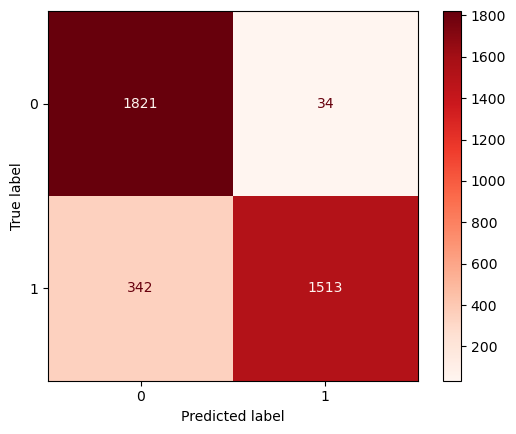

In [124]:
#melihat hasil data yang sudah di training dengan metode random search
y_pred_train_finals = rf_randomcv_best.predict(X_train_finals)

print('F1 Score - Train Set  : ', f1_score(y_trains, y_pred_train_finals), '\n')
print('Classification Report : \n', classification_report(y_trains, y_pred_train_finals), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(rf_randomcv, X_train_finals, y_trains, cmap='Reds'))

F1 Score - Train Set  :  0.46025104602510464 

Classification Report : 
               precision    recall  f1-score   support

           0       0.85      0.88      0.86       464
           1       0.49      0.43      0.46       127

    accuracy                           0.78       591
   macro avg       0.67      0.66      0.66       591
weighted avg       0.77      0.78      0.78       591
 

Confusion Matrix      : 


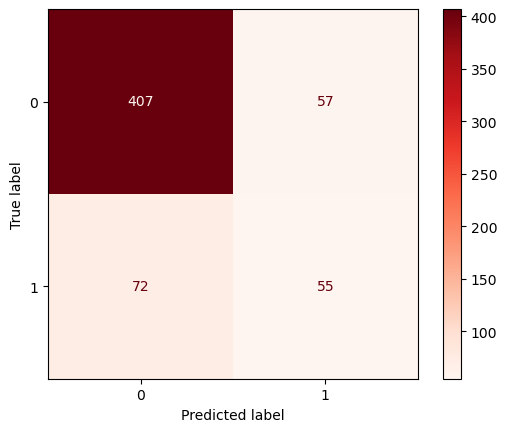

In [125]:
#menampilkan hasil data test dengan metode random search
y_pred_test_finals = rf_randomcv_best.predict(X_test_final)

print('F1 Score - Train Set  : ', f1_score(y_test, y_pred_test_finals), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test_finals), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(rf_randomcv, X_test_final, y_test, cmap='Reds'))

kesimpulan : dilihat dari nilai defult KNN f1_score random search memiliki nilai range train 0.89 dan test 0.46

# ix Model Evaluation

In [126]:
#membuat table baru default untuk nantinya membandingkan dengan nilai f1 score test yang default dan yang sudah dengan menggunakan random seach
all_reports = {}
def performance_report(all_reports, y_trains, y_train_predict_knn, y_test, y_test_predict_knn, name):
  score_reports = {
      'train - precision' : precision_score(y_trains, y_train_predict_knn),
      'train - recall' : recall_score(y_trains, y_train_predict_knn),
      'train - accuracy' : accuracy_score(y_trains, y_train_predict_knn),
      'train - f1_score' : f1_score(y_trains, y_train_predict_knn),
      'test - precision' : precision_score(y_test, y_test_predict_knn),
      'test - recall' : recall_score(y_test, y_test_predict_knn),
      'test - accuracy_score' : accuracy_score(y_test, y_test_predict_knn),
      'test - f1_score' : f1_score(y_test, y_test_predict_knn),
  }
  all_reports[name] = score_reports
  return all_reports

all_reports = performance_report(all_reports, y_trains, y_train_predict_knn, y_test, y_test_predict_knn, 'Baseline (Default Hyperparameter)')
pd.DataFrame(all_reports)

,Baseline (Default Hyperparameter)
test - accuracy_score,0.771574
test - f1_score,0.478764
test - precision,0.469697
test - recall,0.488189
train - accuracy,0.802965
train - f1_score,0.785568
train - precision,0.861647
train - recall,0.721833


In [127]:
#menampilkan tabel perbandingan nilai dari f1 test yang default dan dengan metode random search
all_reports = performance_report(all_reports, y_trains, y_pred_train_finals, y_test, y_pred_test_finals, 'Random Search')
pd.DataFrame(all_reports)

,Baseline (Default Hyperparameter),Random Search
train - precision,0.861647,0.978022
train - recall,0.721833,0.815633
train - accuracy,0.802965,0.898652
train - f1_score,0.785568,0.889477
test - precision,0.469697,0.491071
test - recall,0.488189,0.433071
test - accuracy_score,0.771574,0.781726
test - f1_score,0.478764,0.460251


Hadil : Dari Hasil kesimpulan bisa didapatkan bahwa untuk test-f1score dari model KNN yang lebih bagus adalah yang default. Jadi model yang akan dipakai pada data inference untuk mempredict apakah user berhasil bayar atau tidak adalah KNN default

In [130]:
#mendefine fungsi KNN yang sudah di hyperparameter tuning dengan fungsi random search untuk di simpan dalam file pkl
model_knn=KNeighborsClassifier().fit(X_train_finals,y_trains)

# x. Model Saving

In [131]:
# Model Saving

with open('scaler.pkl', 'wb') as file_1:
  pickle.dump(scaler, file_1)

with open('model_knn.pkl', 'wb') as file_2:
  pickle.dump(model_knn, file_2)